#clustering based

#1st

In [1]:
import folium    #interactive map for the data visulization
import pandas as pd
from sklearn.cluster import KMeans

# Load the sample dataset
data = pd.read_csv('waste_data.csv')

# Extract latitude and longitude columns
coordinates = data[['Latitude', 'Longitude']]

In [2]:
# Number of clusters (you can adjust this based on your needs)
num_clusters = 5

In [3]:
# Create a K-Means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(coordinates)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
# Create a folium map centered at a location within your dataset
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

In [5]:
# Define cluster colors
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']

In [6]:
# Add markers for waste collection points with different cluster colors
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    for index, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=cluster_colors[cluster],
            fill=True,
            fill_color=cluster_colors[cluster],
            fill_opacity=0.7,
            popup=f'Cluster: {cluster}, Type: {row["WasteType"]}, Volume: {row["WasteVolume"]}'
        ).add_to(m)

# Display the map directly in a Jupyter Notebook
m

In [7]:
pip install scikit-learn pandas


#2nd

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('waste_air_quality_measurement.csv')

In [10]:
# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [11]:
print(data.head())

   Site_Location  Latitude  Longitude            DateTime        WasteType  \
0              1   34.0522  -118.2437 2023-09-01 08:00:00      Recyclables   
1              2   34.0522  -118.2437 2023-09-01 09:00:00      Recyclables   
2              3   34.0567  -118.2421 2023-09-01 10:00:00          Organic   
3              4   34.0567  -118.2421 2023-09-01 11:00:00          Organic   
4              5   34.0575  -118.2444 2023-09-01 12:00:00  Non-Recyclables   

  CollectionFrequency CollectionCapacity WasteVolume  AQI  PM2.5  PM10   CO  \
0              Weekly         240 liters      180 kg   65     10    20  0.5   
1              Weekly         240 liters      150 kg   68     11    21  0.6   
2            Biweekly         120 liters       80 kg   72     12    22  0.7   
3            Biweekly         120 liters       85 kg   75     13    23  0.8   
4               Daily         360 liters      300 kg   85     14    24  0.9   

   NO2  SO2  O3  Temperature  Humidity  WindSpeed  Preci

In [12]:
# Basic data summary
print("Dataset Summary:")
print(data.head())

Dataset Summary:
   Site_Location  Latitude  Longitude            DateTime        WasteType  \
0              1   34.0522  -118.2437 2023-09-01 08:00:00      Recyclables   
1              2   34.0522  -118.2437 2023-09-01 09:00:00      Recyclables   
2              3   34.0567  -118.2421 2023-09-01 10:00:00          Organic   
3              4   34.0567  -118.2421 2023-09-01 11:00:00          Organic   
4              5   34.0575  -118.2444 2023-09-01 12:00:00  Non-Recyclables   

  CollectionFrequency CollectionCapacity WasteVolume  AQI  PM2.5  PM10   CO  \
0              Weekly         240 liters      180 kg   65     10    20  0.5   
1              Weekly         240 liters      150 kg   68     11    21  0.6   
2            Biweekly         120 liters       80 kg   72     12    22  0.7   
3            Biweekly         120 liters       85 kg   75     13    23  0.8   
4               Daily         360 liters      300 kg   85     14    24  0.9   

   NO2  SO2  O3  Temperature  Humidity 

In [13]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Site_Location        15 non-null     int64         
 1   Latitude             15 non-null     float64       
 2   Longitude            15 non-null     float64       
 3   DateTime             15 non-null     datetime64[ns]
 4   WasteType            15 non-null     object        
 5   CollectionFrequency  15 non-null     object        
 6   CollectionCapacity   15 non-null     object        
 7   WasteVolume          15 non-null     object        
 8   AQI                  15 non-null     int64         
 9   PM2.5                15 non-null     int64         
 10  PM10                 15 non-null     int64         
 11  CO                   15 non-null     float64       
 12  NO2                  15 non-null     int64         
 13  SO2            

In [14]:
# Analyze waste management data
print("\nWaste Management Summary:")
waste_summary = data[['WasteType', 'CollectionFrequency', 'WasteVolume']].describe()
print(waste_summary)



Waste Management Summary:
          WasteType CollectionFrequency WasteVolume
count            15                  15          15
unique            3                   4          14
top     Recyclables              Weekly      200 kg
freq              6                   6           2


In [15]:
# Analyze air quality data
print("\nAir Quality Summary:")
air_quality_summary = data[['AQI', 'PM2.5', 'CO', 'NO2', 'SO2', 'O3']].describe()
print(air_quality_summary)




Air Quality Summary:
             AQI      PM2.5         CO        NO2        SO2         O3
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000
mean   77.866667  17.000000   1.200000  22.000000   6.266667  37.000000
std     8.105260   4.472136   0.447214   4.472136   2.250926   4.472136
min    65.000000  10.000000   0.500000  15.000000   3.000000  30.000000
25%    72.000000  13.500000   0.850000  18.500000   4.500000  33.500000
50%    78.000000  17.000000   1.200000  22.000000   6.000000  37.000000
75%    82.500000  20.500000   1.550000  25.500000   8.000000  40.500000
max    92.000000  24.000000   1.900000  29.000000  10.000000  44.000000


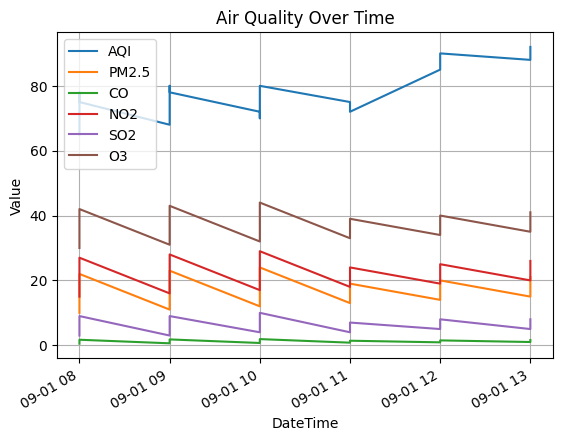

In [16]:
# Visualize air quality over time
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)
data[['AQI', 'PM2.5', 'CO', 'NO2', 'SO2', 'O3']].plot(title='Air Quality Over Time')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.grid()
plt.legend(loc='upper left')
plt.show()

#3rd

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('waste_air_quality_measurement.csv')

In [19]:
# Assuming you have features like temperature, humidity, and time
X = data[['Temperature', 'Humidity']].values
y = data['Site_Location'].values

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
"""
if we having issue regaring conversion from string to float or int
import pandas as pd

# Create a sample DataFrame
data = pd.DataFrame({'DateTime': ['2023-09-01 8:00:00', '2023-09-01 09:00:00', '2023-09-01 10:00:00', '2023-09-01 11:00:00', '2023-09-01 12:00:00', '2023-09-01 13:00:00]})

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Convert the 'DateTime' column to float
data['FloatDateTime'] = data['DateTime'].apply(lambda x: float(x.timestamp()))

# Print the DataFrame
print(data)
"""


"\nif we having issue regaring conversion from string to float or int\nimport pandas as pd\n\n# Create a sample DataFrame\ndata = pd.DataFrame({'DateTime': ['2023-09-01 8:00:00', '2023-09-01 09:00:00', '2023-09-01 10:00:00', '2023-09-01 11:00:00', '2023-09-01 12:00:00', '2023-09-01 13:00:00]})\n\n# Convert the 'DateTime' column to datetime format\ndata['DateTime'] = pd.to_datetime(data['DateTime'])\n\n# Convert the 'DateTime' column to float\ndata['FloatDateTime'] = data['DateTime'].apply(lambda x: float(x.timestamp()))\n\n# Print the DataFrame\nprint(data)\n"

In [22]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)



In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.4183972559577176e-30
R-squared: 1.0


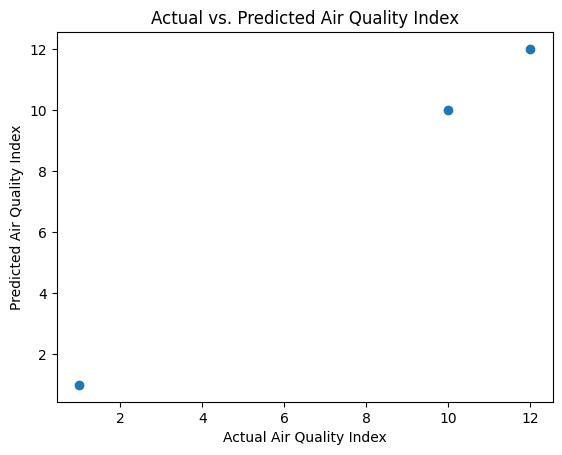

In [26]:
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Air Quality Index")
plt.ylabel("Predicted Air Quality Index")
plt.title("Actual vs. Predicted Air Quality Index")
plt.show()


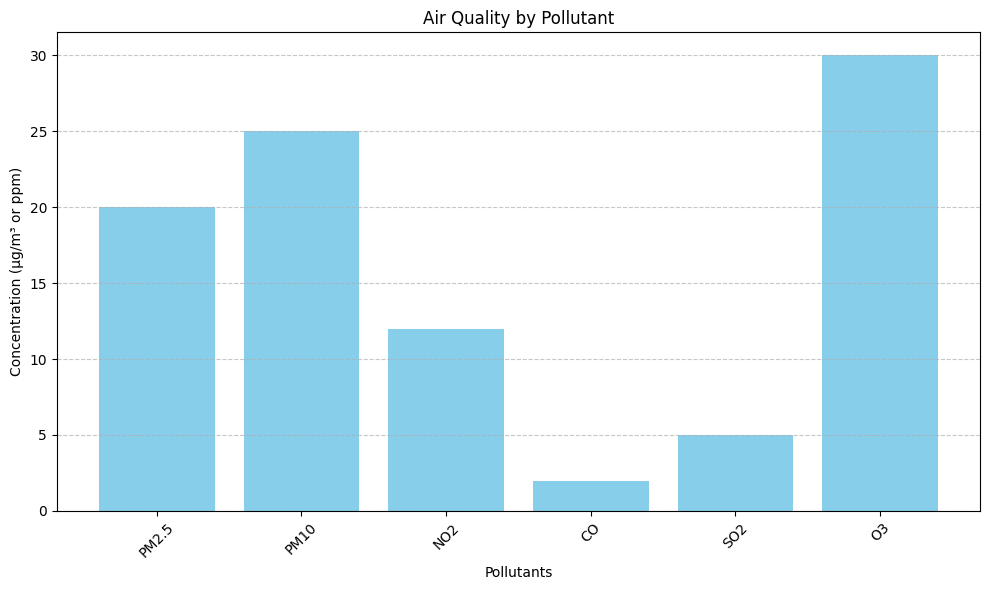

In [27]:
import matplotlib.pyplot as plt


pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']   ## Sample air quality data (replace with your own data)
concentration = [20, 25, 12, 2, 5, 30]

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.bar(pollutants, concentration, color='skyblue')
plt.xlabel('Pollutants')
plt.ylabel('Concentration (µg/m³ or ppm)')
plt.title('Air Quality by Pollutant')


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()
